# CASE STUDY - CONSTRUCTING AN IBOR CURVE

Case study for Hyderabad Conference December 2020

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from financepy.finutils import *
from financepy.products.funding import *

####################################################################
# FINANCEPY BETA Version 0.186 - This build:  01 Dec 2020 at 13:21 #
#      This software is distributed FREE & WITHOUT ANY WARRANTY    #
# For info and disclaimer - https://github.com/domokane/FinancePy  #
#      Send any bug reports or comments to quant@financepy.com     #
####################################################################



In [3]:
setDateFormatType(FinDateFormatTypes.UK_LONG)

In [4]:
valuationDate = FinDate(30, 11, 2018)

In [5]:
interpType = FinInterpTypes.LINEAR_ZERO_RATES

## Build a USD Libor Single Curve

In [6]:
depos = []; fras = []; swaps = []

spotDays = 0
settlementDate = valuationDate.addWeekDays(spotDays)
depoDCCType = FinDayCountTypes.ACT_360
depo = FinIborDeposit(settlementDate, "6M", -0.2510/100.0, depoDCCType); depos.append(depo)
fraDCCType = FinDayCountTypes.ACT_360

fra = FinIborFRA(settlementDate.addTenor("1M"), "6M", -0.2450/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("2M"), "6M", -0.2435/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("3M"), "6M", -0.2400/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("4M"), "6M", -0.2360/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("5M"), "6M", -0.2285/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("6M"), "6M", -0.2230/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("7M"), "6M", -0.2110/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("8M"), "6M", -0.1990/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("9M"), "6M", -0.1850/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("10M"), "6M", -0.1680/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("11M"), "6M", -0.1510/100.0, fraDCCType); fras.append(fra)
fra = FinIborFRA(settlementDate.addTenor("12M"), "6M", -0.1360/100.0, fraDCCType); fras.append(fra)

swapType = FinSwapTypes.PAY
fixedDCCType = FinDayCountTypes.THIRTY_360_BOND
fixedFreqType = FinFrequencyTypes.ANNUAL

swap = FinIborSwap(settlementDate, "2Y", swapType, -0.1525/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "3Y", swapType, -0.0185/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "4Y", swapType, 0.1315/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "5Y", swapType, 0.2745/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "6Y", swapType, 0.4135/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "7Y", swapType, 0.5439/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "8Y", swapType, 0.6652/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "9Y", swapType, 0.7784/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "10Y", swapType, 0.8799/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "11Y", swapType, 0.9715/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "12Y", swapType, 1.0517/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "15Y", swapType, 1.2369/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "20Y", swapType, 1.3965/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "25Y", swapType, 1.4472/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "30Y", swapType, 1.4585/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "35Y", swapType, 1.4595/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "40Y", swapType, 1.4535/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "45Y", swapType, 1.4410/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)
swap = FinIborSwap(settlementDate, "50Y", swapType, 1.4335/100.0, fixedFreqType, fixedDCCType); swaps.append(swap)

iborCurve = FinIborSingleCurve(valuationDate, depos, fras, swaps, interpType)

## Examining the Curve

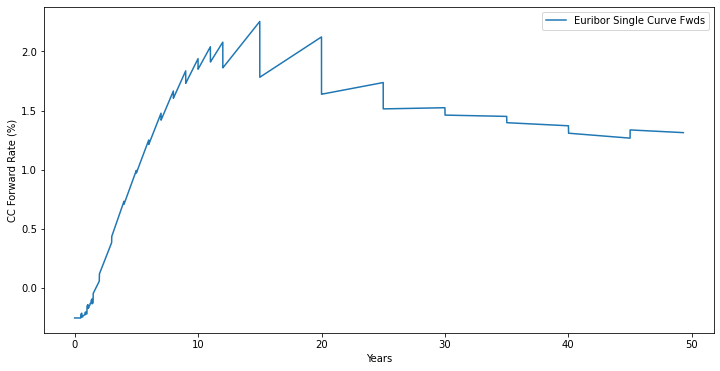

In [8]:
dayMax = 50*360
years = np.linspace(0, dayMax/365, dayMax)
dates = valuationDate.addYears(years)
liborSingleCurveFwds = iborCurve.fwd(dates)    

plt.figure(figsize=(12,6))
plt.plot(years, liborSingleCurveFwds*100, label="Euribor Single Curve Fwds")
plt.xlabel("Years")
plt.ylabel("CC Forward Rate (%)")
plt.legend();

## Transparency

In [9]:
swaps[0].printFixedLegPV()

START DATE: 30-NOV-2018
MATURITY DATE: 30-NOV-2020
COUPON (%): -0.1525
FREQUENCY: FinFrequencyTypes.ANNUAL
DAY COUNT: FinDayCountTypes.THIRTY_360_BOND
PAY_DATE     ACCR_START   ACCR_END     DAYS  YEARFRAC    RATE      PAYMENT       DF          PV        CUM PV
02-DEC-2019  30-NOV-2018  02-DEC-2019   362  1.005556  -0.15250     -1533.47  1.00240918     -1537.17     -1537.17
30-NOV-2020  02-DEC-2019  30-NOV-2020   358  0.994444  -0.15250     -1516.53  1.00305833     -1521.17     -3058.33


In [10]:
swaps[0]._floatLeg.printValuation()

START DATE: 30-NOV-2018
MATURITY DATE: 30-NOV-2020
SPREAD (BPS): 0.0
FREQUENCY: FinFrequencyTypes.QUARTERLY
DAY COUNT: FinDayCountTypes.THIRTY_E_360
PAY_DATE     ACCR_START   ACCR_END     DAYS  YEARFRAC    IBOR      PAYMENT       DF          PV        CUM PV
28-FEB-2019  30-NOV-2018  28-FEB-2019    88  0.244444   -0.25678      -627.69  1.00062809      -628.09      -628.09
29-MAY-2019  28-FEB-2019  29-MAY-2019    91  0.252778   -0.24799      -626.86  1.00125574      -627.65     -1255.74
29-AUG-2019  29-MAY-2019  29-AUG-2019    90  0.250000   -0.23461      -586.51  1.00184334      -587.60     -1843.34
29-NOV-2019  29-AUG-2019  29-NOV-2019    90  0.250000   -0.22069      -551.72  1.00239638      -553.05     -2396.38
02-MAR-2020  29-NOV-2019  02-MAR-2020    93  0.258333   -0.15432      -398.65  1.00279615      -399.77     -2796.15
01-JUN-2020  02-MAR-2020  01-JUN-2020    89  0.247222   -0.11730      -289.98  1.00308703      -290.88     -3087.03
31-AUG-2020  01-JUN-2020  31-AUG-2020    89  

## Swap Valuation

In [11]:
startDate = FinDate(27, 12, 2017)
maturityDate = FinDate(27, 12, 2067)
notional = 10 * ONE_MILLION
swapType = FinSwapTypes.RECEIVE

In [12]:
fixedRate = 0.0150
fixedDCCType = FinDayCountTypes.THIRTY_360_BOND
fixedFreqType = FinFrequencyTypes.ANNUAL

In [13]:
floatSpread = 0.0
principal = 0.0
floatDCCType = FinDayCountTypes.ACT_360
floatFreqType = FinFrequencyTypes.SEMI_ANNUAL

In [14]:
offMarketSwap = FinIborSwap(startDate, maturityDate, swapType, 
                            fixedRate, fixedFreqType, fixedDCCType,
                            notional,
                            floatSpread, floatFreqType, floatDCCType, 
                            FinCalendarTypes.TARGET)

In [15]:
interpType = FinInterpTypes.LINEAR_ZERO_RATES

In [16]:
offMarketSwap.value(valuationDate, iborCurve, iborCurve, -0.268/100.0)

381271.3571003089

In Bloomberg, this swap has a value of 388,147.49 - why the difference - BBG uses a Dual Curve.

Copyright (c) Dominic O'Kane 2020